In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist  # lub emnist, jeśli korzystasz z tego zbioru danych
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import cv2


In [2]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()
#X_trian = 255- X_train
#X_test = 255- X_test
X_train, X_test = X_train/255.0, X_test/255.0

In [3]:
model = Sequential([
    Flatten(input_shape= (28,28)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

C:\programy\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [5]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8814 - loss: 0.4178
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9679 - loss: 0.1049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9774 - loss: 0.0718
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9845 - loss: 0.0492
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9879 - loss: 0.0389
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9885 - loss: 0.0337
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0273
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9931 - loss: 0.0235
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9939 - loss: 0.0186
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0164


In [6]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose = 2)

313/313 - 1s - 5ms/step - accuracy: 0.9795 - loss: 0.0864


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted class: 8


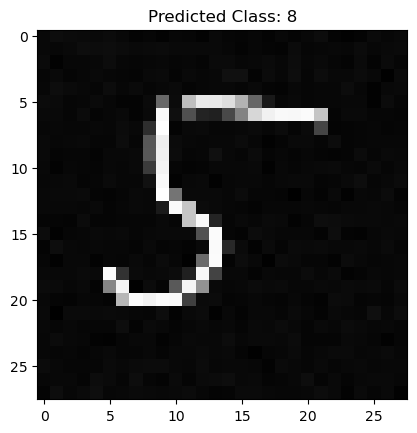

In [7]:


# Funkcja do załadowania i przetworzenia obrazu
def prepare_image(image_path):
    # Załaduj obraz
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Przeskaluj do rozmiaru 28x28
    img = cv2.resize(img, (28, 28))
    # Normalizacja wartości pikseli
    img = 255.0 - img #inwersja kolorów w zdjecia z białego na czarny i odwrotnie
    img = img / 255.0
    # Zmiana kształtu na (1, 28, 28) - wymagany przez model
    img = img.reshape(1, 28, 28)
    return img

# Przykład wczytania i przetworzenia obrazu
image_path = r"C:\Base_Camp\Pliki\numbers\IMG-20240620-WA0023.jpg"  # Zastąp ścieżką do twojego obrazu
prepared_image = prepare_image(image_path)

# Dokonanie prognozy
prediction = model.predict(prepared_image)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {predicted_class[0]}')

plt.imshow(prepared_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Class: {predicted_class[0]}')
plt.show()

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)